In [ ]:
pip install tensorflow scikit-learn

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Assume the dataset has features and a binary target variable named 'repaid_loan'
df = pd.read_csv('mlp_data_preprocessed.csv')

In [ ]:
print("NaN values in df", df.isnull().sum())

NaN values in df loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
int_rate               0
installment            0
                      ..
emp_length_6 years     1
emp_length_7 years     1
emp_length_8 years     1
emp_length_9 years     1
emp_length_< 1 year    1
Length: 153, dtype: int64


In [ ]:
#if null values
df = df.dropna()

In [ ]:
# Extract features and target variable
X = df.drop('good_bad', axis=1)
y = df['good_bad']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Build the DNN model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1696/1696 [==============================] - 12s 6ms/step - loss: 0.3128 - accuracy: 0.8830 - val_loss: 0.3074 - val_accuracy: 0.8826
Epoch 2/10
1696/1696 [==============================] - 4s 2ms/step - loss: 0.2871 - accuracy: 0.8854 - val_loss: 0.3068 - val_accuracy: 0.8814
Epoch 3/10
1696/1696 [==============================] - 4s 2ms/step - loss: 0.2783 - accuracy: 0.8866 - val_loss: 0.3107 - val_accuracy: 0.8815
Epoch 4/10
1696/1696 [==============================] - 5s 3ms/step - loss: 0.2706 - accuracy: 0.8875 - val_loss: 0.3153 - val_accuracy: 0.8759
Epoch 5/10
1696/1696 [==============================] - 5s 3ms/step - loss: 0.2625 - accuracy: 0.8901 - val_loss: 0.3222 - val_accuracy: 0.8759
Epoch 6/10
1696/1696 [==============================] - 4s 2ms/step - loss: 0.2531 - accuracy: 0.8939 - val_loss: 0.3283 - val_accuracy: 0.8712
Epoch 7/10
1696/1696 [==============================] - 5s 3ms/step - loss: 0.2433 - accuracy: 0.8966 - val_loss: 0.3393 - val_accuracy

In [ ]:
# Evaluate the model on the test set
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

530/530 [==============================] - 1s 1ms/step


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
print(f"Accuracy of DNN: {accuracy:.4f}")
print("\nClassification Report:\n", report)

Accuracy of DNN: 0.8700

Classification Report:
               precision    recall  f1-score   support

         0.0       0.32      0.15      0.21      1882
         1.0       0.90      0.96      0.93     15076

    accuracy                           0.87     16958
   macro avg       0.61      0.56      0.57     16958
weighted avg       0.84      0.87      0.85     16958



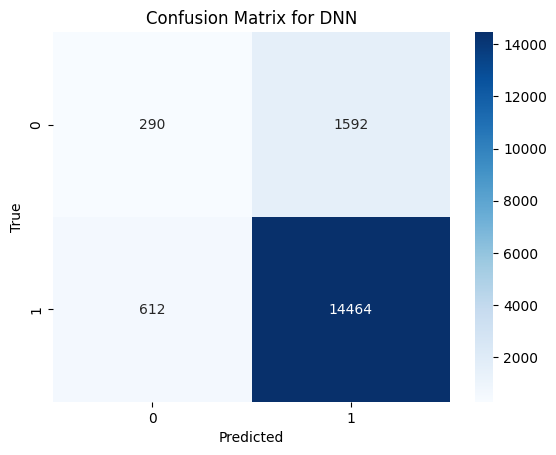

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for DNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
